# Exploratory Data Analysis

## Libraries
The researchers loaded libaries that are popular in data science such as `pandas`, `numpy`, and `matplotlib`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

After that, they loaded their data.

In [2]:
df_md = pd.read_csv("merged_data.csv")
df_md.head() # Preview of dataset

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,bits_of_entropy,strength
0,123456,6,0,6,0,0,0,0,15.509775,0.172331
1,password,8,8,0,0,8,0,2,22.458839,0.249543
2,12345678,8,0,8,0,0,0,0,24.000000,0.266667
3,qwerty,6,6,0,0,6,0,1,15.509775,0.172331
4,123456789,9,0,9,0,0,0,0,28.529325,0.316993


## Plots

### Examination of Password Lengths
The researchers first decided to examine the lengths of the passwords. They found out that most passwords have a length of six to eight characters.

In [3]:
df_md['length'].describe()

count    12816.000000
mean         6.822488
std          1.460072
min          3.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         20.000000
Name: length, dtype: float64

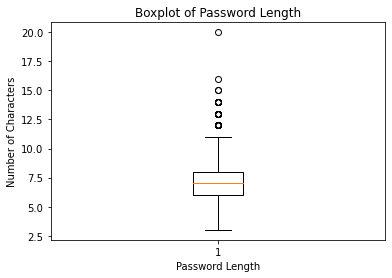

In [4]:
plt.boxplot(df_md['length'])

plt.title("Boxplot of Password Length")
plt.xlabel("Password Length")
plt.ylabel("Number of Characters")

plt.show()

The distribution of the length of passwords is distributed to the right. That finding means that common passwords tend to be short.

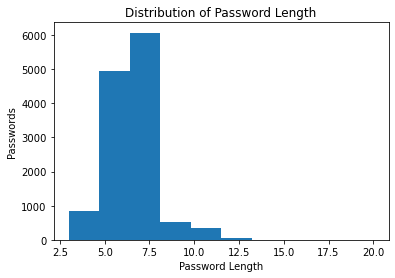

In [5]:
plt.hist(df_md['length'])

plt.title("Distribution of Password Length")
plt.xlabel("Password Length")
plt.ylabel("Passwords")

plt.show()

### Examination of Short and Long Passwords
The researchers separated their dataset into two dataframes with short (less than 8 characters) and long (at least 8 characters characters) passwords.<br><br>
The researchers found out that longer passwords tended to be stronger. Based on these findings, they recommended setting a minimum length for passwords and not limiting the password length.

In [6]:
long = df_md[df_md['length'] >= 8]
long.head() # Preview of dataframe

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,bits_of_entropy,strength
1,password,8,8,0,0,8,0,2,22.458839,0.249543
2,12345678,8,0,8,0,0,0,0,24.000000,0.266667
4,123456789,9,0,9,0,0,0,0,28.529325,0.316993
11,wrongpassword,13,13,0,0,13,0,3,41.209025,0.517160
13,football,8,8,0,0,8,0,3,20.679700,0.229774


In [7]:
short = df_md[df_md['length'] < 8]
short.head() # Preview of dataframe

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,bits_of_entropy,strength
0,123456,6,0,6,0,0,0,0,15.509775,0.172331
3,qwerty,6,6,0,0,6,0,1,15.509775,0.172331
5,12345,5,0,5,0,0,0,0,11.609640,0.128996
6,1234,4,0,4,0,0,0,0,8.000000,0.088889
7,111111,6,0,6,0,0,0,0,0.000000,0.000000


#### Examination of Long Passwords

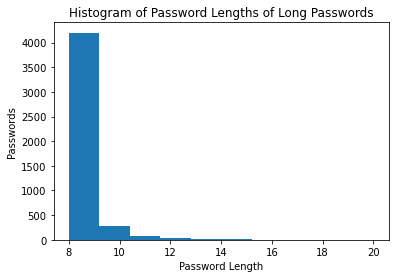

In [8]:
plt.hist(long['length'])

plt.title("Histogram of Password Lengths of Long Passwords")
plt.xlabel("Password Length")
plt.ylabel("Passwords")

plt.show()

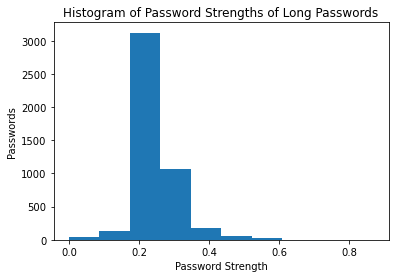

In [9]:
plt.hist(long['strength'])

plt.title("Histogram of Password Strengths of Long Passwords")
plt.xlabel("Password Strength")
plt.ylabel("Passwords")

plt.show()

#### Examination of Short Passwords

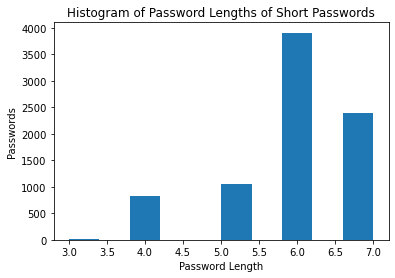

In [10]:
plt.hist(short['length'])

plt.title("Histogram of Password Lengths of Short Passwords")
plt.xlabel("Password Length")
plt.ylabel("Passwords")

plt.show()

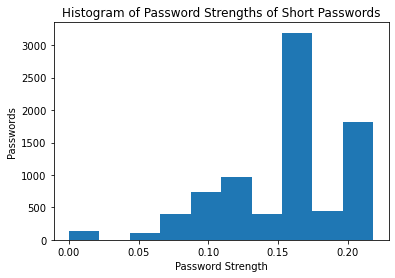

In [11]:
plt.hist(short['strength'])

plt.title("Histogram of Password Strengths of Short Passwords")
plt.xlabel("Password Strength")
plt.ylabel("Passwords")

plt.show()

### Examination of Special Characters in Passwords
The researchers found out that of 12816 passwords, only 26 had special characters. Most of these passwords are weak. The average strength of passwords with special characters is close to the average strength of all passwords. However, the third quartile of passwords with special characters is further from the average, which means that adding special characters to passwords increases the chances of having a strong password.

In [12]:
special_chars = df_md['num_special']
special_chars.head()

0    0
1    0
2    0
3    0
4    0
Name: num_special, dtype: int64

(array([1.279e+04, 1.700e+01, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 4.000e+00]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

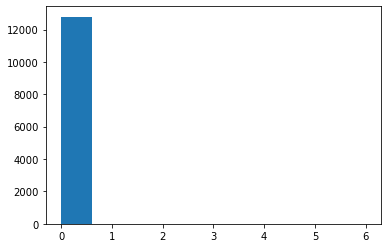

In [13]:
plt.hist(special_chars)

In [14]:
special_chars2 = df_md[df_md['num_special'] >= 1]
special_chars2

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,bits_of_entropy,strength
2153,0.0.000,7,0,5,0,0,2,0,7.000000,0.077778
2536,fuck_inside,11,10,0,0,10,1,4,36.541209,0.447734
3331,0.0.0.000,9,0,6,0,0,3,0,9.000000,0.100000
4515,f**k,4,2,0,0,2,2,0,6.339850,0.070443
4743,*****,5,0,0,0,0,5,0,0.000000,0.000000
5476,??????,6,0,0,0,0,6,0,0.000000,0.000000
6773,sasha_007,9,5,3,0,5,1,2,23.264663,0.258496
6894,w_pass,6,5,0,0,5,1,1,13.931569,0.154795
7018,******,6,0,0,0,0,6,0,0.000000,0.000000
7522,k.lvbkf,7,6,0,0,6,1,0,18.094738,0.201053


In [15]:
special_chars2.describe()

,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,bits_of_entropy,strength
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,7.653846,4.000000,1.423077,0.423077,3.576923,2.230769,1.153846,18.432896,0.213281
std,2.296821,3.544009,2.452314,0.808608,3.276255,1.986106,1.592289,12.695863,0.156564
min,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.232892,0.113699
50%,7.000000,5.000000,0.000000,0.000000,4.000000,1.000000,0.500000,16.802256,0.186692
75%,9.000000,6.000000,2.750000,0.750000,5.000000,2.750000,2.000000,23.816166,0.264624
max,13.000000,11.000000,10.000000,3.000000,10.000000,6.000000,6.000000,46.604513,0.586607


(array([17.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  2.,  4.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

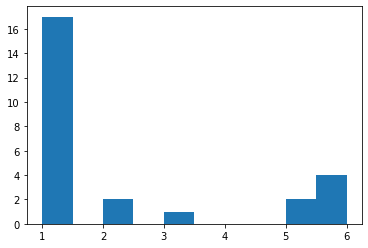

In [16]:
plt.hist(special_chars2['num_special'])

{'whiskers': [<matplotlib.lines.Line2D at 0x195f370d5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x195f3716640>,
 'boxes': [<matplotlib.lines.Line2D at 0x195f370db50>],
 'medians': [<matplotlib.lines.Line2D at 0x195f3716fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x195f37167c0>],
 'means': []}

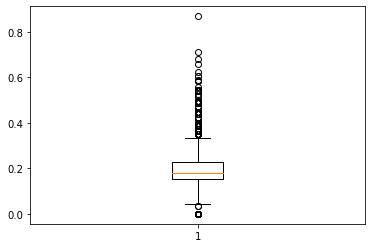

In [17]:
plt.boxplot(df_md['strength'])

{'whiskers': [<matplotlib.lines.Line2D at 0x195f36f0730>,
 'caps': [<matplotlib.lines.Line2D at 0x195f36f0070>,
 'boxes': [<matplotlib.lines.Line2D at 0x195f36e8c40>],
 'medians': [<matplotlib.lines.Line2D at 0x195f36d3400>],
 'fliers': [<matplotlib.lines.Line2D at 0x195f36d3c70>],
 'means': []}

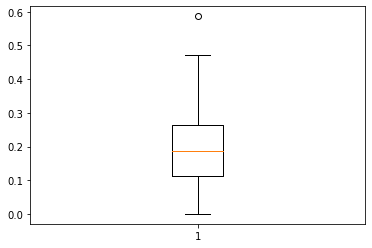

In [18]:
plt.boxplot(special_chars2['strength'])

### Evaluation of Password Strengths
As stated in [the source code for `password_strength`](https://github.com/kolypto/py-password-strength/blob/master/password_strength/stats.py), a strength of `0.33` or refers to a weak password. Strong passwords have a strength of at least `0.66`. The researchers segregated the passwords by strength and analyzed them. They found that strong passwords tended to be long.

In [19]:
strongest_pw = df_md.sort_values('strength')
strongest_pw.tail() # top 5 strongest passwords

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,bits_of_entropy,strength
11197,gabinphilippeau,15,15,0,0,15,0,7,49.828921,0.623244
12194,1q2w3e4r5t6y7u,14,7,7,0,7,0,2,53.302969,0.659092
2200,Mailcreated5240,15,11,4,1,10,0,5,55.506596,0.680041
4759,PolniyPizdec0211,16,12,4,2,10,0,4,59.207035,0.712366
12193,1q2w3e4r5t6y7u8i9o0p,20,10,10,0,10,0,4,86.438562,0.868639


In [20]:
medium_strength = df_md[df_md['strength'] >= .33]
medium_strength

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,bits_of_entropy,strength
11,wrongpassword,13,13,0,0,13,0,3,41.209025,0.517160
20,qwertyuiop,10,10,0,0,10,0,4,33.219281,0.392327
23,1234567890,10,0,10,0,0,0,0,33.219281,0.392327
119,q1w2e3r4t5,10,5,5,0,5,0,1,33.219281,0.392327
373,1q2w3e4r5t,10,5,5,0,5,0,1,33.219281,0.392327
...,...,...,...,...,...,...,...,...,...,...
12776,dothingocthuy,13,13,0,0,13,0,4,43.185065,0.543853
12782,minhphuong,10,10,0,0,10,0,3,30.000000,0.333333
12783,hoangphuong,11,11,0,0,11,0,4,30.880904,0.350023
12796,handoivodoi,11,11,0,0,11,0,6,30.880904,0.350023


In [21]:
strong_strength = df_md[df_md['strength'] >= .66]
strong_strength

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,bits_of_entropy,strength
2200,Mailcreated5240,15,11,4,1,10,0,5,55.506596,0.680041
4759,PolniyPizdec0211,16,12,4,2,10,0,4,59.207035,0.712366
12193,1q2w3e4r5t6y7u8i9o0p,20,10,10,0,10,0,4,86.438562,0.868639


### Evaluation of Uppercase Characters
Out of 12816 passwords, only 189 had uppercase characters.

In [22]:
pw_upperc = df_md[df_md['num_upper'] >= 1]
pw_upperc.head()

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,bits_of_entropy,strength
106,YourNan,7,7,0,2,5,0,3,19.651484,0.218350
275,Password,8,8,0,1,7,0,2,22.458839,0.249543
709,Usuckballz1,11,10,1,1,9,0,2,36.541209,0.447734
808,PASSWORD,8,8,0,8,0,0,0,22.458839,0.249543
1214,Soso123aljg,11,8,3,1,7,0,3,36.541209,0.447734


In [23]:
pw_upperc.describe()

,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,bits_of_entropy,strength
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,7.746032,6.550265,1.158730,1.968254,4.582011,0.037037,1.740741,21.935744,0.247847
std,1.912737,1.582438,1.632838,1.901580,2.438585,0.189354,1.203488,7.989073,0.097693
min,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.088889
25%,6.000000,6.000000,0.000000,1.000000,4.000000,0.000000,1.000000,15.509775,0.172331
50%,8.000000,6.000000,0.000000,1.000000,5.000000,0.000000,2.000000,20.679700,0.229774
75%,9.000000,7.000000,2.000000,2.000000,6.000000,0.000000,2.000000,25.849625,0.287218
max,16.000000,12.000000,8.000000,10.000000,10.000000,1.000000,6.000000,59.207035,0.712366


(array([132.,  22.,   5.,   5.,   3.,  14.,   4.,   3.,   0.,   1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

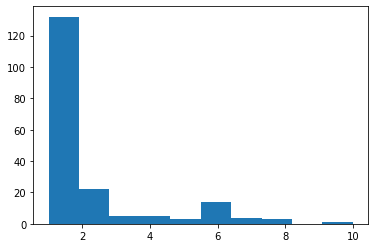

In [24]:
plt.hist(pw_upperc['num_upper'])

In [25]:
medium_strengthupp = pw_upperc[pw_upperc['strength'] >= .33]
medium_strengthupp

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,bits_of_entropy,strength
709,Usuckballz1,11,10,1,1,9,0,2,36.541209,0.447734
1214,Soso123aljg,11,8,3,1,7,0,3,36.541209,0.447734
2200,Mailcreated5240,15,11,4,1,10,0,5,55.506596,0.680041
3337,Sojdlg123aljg,13,10,3,1,9,0,2,43.185065,0.543853
3609,Translator,10,10,0,1,9,0,3,30.000000,0.333333
4759,PolniyPizdec0211,16,12,4,2,10,0,4,59.207035,0.712366
4859,7uGd5HIp2J,10,7,3,4,3,0,1,33.219281,0.392327
5200,vSjasnel12,10,8,2,1,7,0,2,33.219281,0.392327
6024,Good123654,10,4,6,1,3,0,2,31.699250,0.365153
7499,Password123,11,8,3,1,7,0,2,36.541209,0.447734


In [26]:
len(medium_strengthupp)

40

In [27]:
Strongstrengthupp = pw_upperc[pw_upperc['strength'] >= .66]
Strongstrengthupp

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,bits_of_entropy,strength
2200,Mailcreated5240,15,11,4,1,10,0,5,55.506596,0.680041
4759,PolniyPizdec0211,16,12,4,2,10,0,4,59.207035,0.712366


### Evaluation of Strength
Length is the most important in making a password strong.

<BarContainer object of 12816 artists>

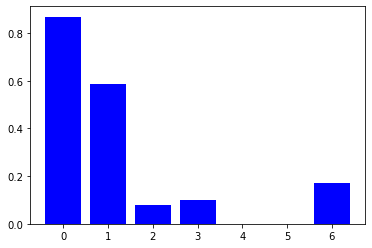

In [28]:
plt.bar("num_special", "strength", data = df_md, color = "blue")

<BarContainer object of 12816 artists>

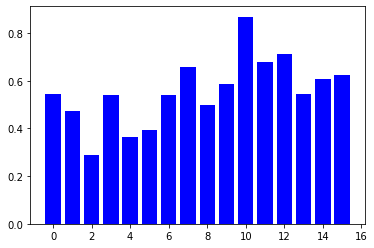

In [29]:
plt.bar("num_chars", "strength", data = df_md, color = "blue")

<BarContainer object of 12816 artists>

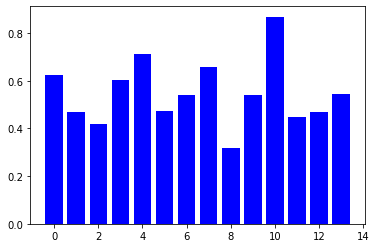

In [30]:
plt.bar("num_digits", "strength", data = df_md, color = "blue")

<BarContainer object of 12816 artists>

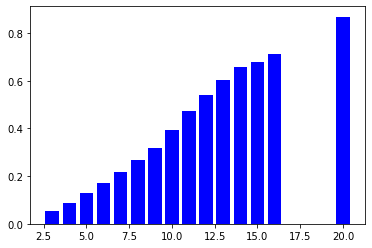

In [31]:
plt.bar("length", "strength", data = df_md, color = "blue")

In [32]:
pw_length = df_md[df_md['length'] >= 1]

In [33]:
medium_strengthL = pw_length[pw_length['strength'] >= .33]
medium_strengthL

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,bits_of_entropy,strength
11,wrongpassword,13,13,0,0,13,0,3,41.209025,0.517160
20,qwertyuiop,10,10,0,0,10,0,4,33.219281,0.392327
23,1234567890,10,0,10,0,0,0,0,33.219281,0.392327
119,q1w2e3r4t5,10,5,5,0,5,0,1,33.219281,0.392327
373,1q2w3e4r5t,10,5,5,0,5,0,1,33.219281,0.392327
...,...,...,...,...,...,...,...,...,...,...
12776,dothingocthuy,13,13,0,0,13,0,4,43.185065,0.543853
12782,minhphuong,10,10,0,0,10,0,3,30.000000,0.333333
12783,hoangphuong,11,11,0,0,11,0,4,30.880904,0.350023
12796,handoivodoi,11,11,0,0,11,0,6,30.880904,0.350023


<BarContainer object of 340 artists>

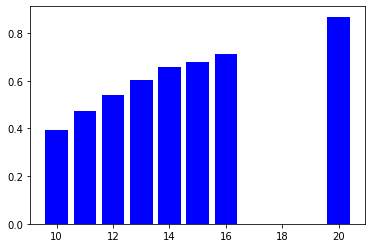

In [34]:
plt.bar("length", "strength", data = medium_strengthL, color = "blue")

<BarContainer object of 340 artists>

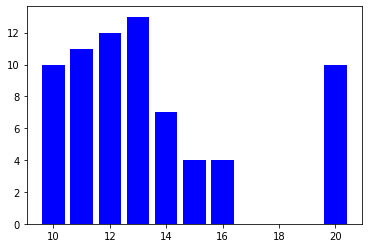

In [35]:
plt.bar("length", "num_digits", data = medium_strengthL, color = "blue")

<BarContainer object of 340 artists>

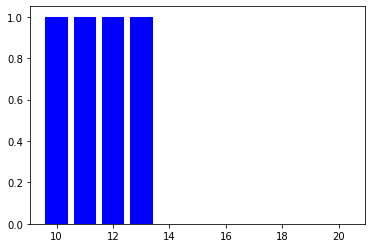

In [36]:
plt.bar("length", "num_special", data = medium_strengthL, color = "blue")

<BarContainer object of 340 artists>

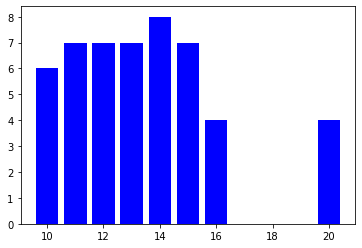

In [37]:
plt.bar("length", "num_vowels", data = medium_strengthL, color = "blue")

In [38]:
medium_strengthL.head()

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,bits_of_entropy,strength
11,wrongpassword,13,13,0,0,13,0,3,41.209025,0.517160
20,qwertyuiop,10,10,0,0,10,0,4,33.219281,0.392327
23,1234567890,10,0,10,0,0,0,0,33.219281,0.392327
119,q1w2e3r4t5,10,5,5,0,5,0,1,33.219281,0.392327
373,1q2w3e4r5t,10,5,5,0,5,0,1,33.219281,0.392327


In [39]:
weakS = df_md[df_md['strength'] < .33]
weakS.head()

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,bits_of_entropy,strength
0,123456,6,0,6,0,0,0,0,15.509775,0.172331
1,password,8,8,0,0,8,0,2,22.458839,0.249543
2,12345678,8,0,8,0,0,0,0,24.000000,0.266667
3,qwerty,6,6,0,0,6,0,1,15.509775,0.172331
4,123456789,9,0,9,0,0,0,0,28.529325,0.316993


<BarContainer object of 12476 artists>

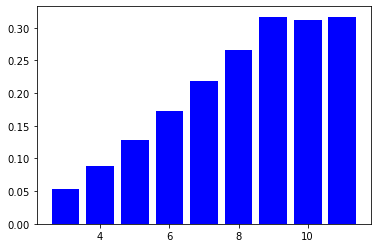

In [40]:
plt.bar("length", "strength", data = weakS, color = "blue")

In [41]:
df_md[(df_md["length"] >= 10) & (df_md["num_vowels"] >= 1) & (df_md["strength"] >= .33)]

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,bits_of_entropy,strength
11,wrongpassword,13,13,0,0,13,0,3,41.209025,0.517160
20,qwertyuiop,10,10,0,0,10,0,4,33.219281,0.392327
119,q1w2e3r4t5,10,5,5,0,5,0,1,33.219281,0.392327
373,1q2w3e4r5t,10,5,5,0,5,0,1,33.219281,0.392327
673,12345qwert,10,5,5,0,5,0,1,33.219281,0.392327
...,...,...,...,...,...,...,...,...,...,...
12776,dothingocthuy,13,13,0,0,13,0,4,43.185065,0.543853
12782,minhphuong,10,10,0,0,10,0,3,30.000000,0.333333
12783,hoangphuong,11,11,0,0,11,0,4,30.880904,0.350023
12796,handoivodoi,11,11,0,0,11,0,6,30.880904,0.350023


In [42]:
df_md[(df_md["length"] >= 10) & (df_md["num_vowels"] >= 0) & (df_md["strength"] < .33)]

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,bits_of_entropy,strength
409,4815162342,10,0,10,0,0,0,0,28.073549,0.311928
704,1234554321,10,0,10,0,0,0,0,23.219281,0.257992
918,1111111111,10,0,10,0,0,0,0,0.000000,0.000000
1112,basketball,10,10,0,0,10,0,3,28.073549,0.311928
1740,1123581321,10,0,10,0,0,0,0,23.219281,0.257992
...,...,...,...,...,...,...,...,...,...,...
12692,thanhthanh,10,10,0,0,10,0,2,20.000000,0.222222
12744,thanhtrung,10,10,0,0,10,0,2,28.073549,0.311928
12766,thanhhuyen,10,10,0,0,10,0,3,28.073549,0.311928
12790,thanhtuyen,10,10,0,0,10,0,3,28.073549,0.311928


In [43]:
df_md[(df_md["length"] < 10) & (df_md["num_vowels"] >= 0) & (df_md["strength"] < .33)]

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,bits_of_entropy,strength
0,123456,6,0,6,0,0,0,0,15.509775,0.172331
1,password,8,8,0,0,8,0,2,22.458839,0.249543
2,12345678,8,0,8,0,0,0,0,24.000000,0.266667
3,qwerty,6,6,0,0,6,0,1,15.509775,0.172331
4,123456789,9,0,9,0,0,0,0,28.529325,0.316993
...,...,...,...,...,...,...,...,...,...,...
12811,hongngoc,8,8,0,0,8,0,2,18.575425,0.206394
12812,anhtien,7,7,0,0,7,0,3,18.094738,0.201053
12813,lanhuong,8,8,0,0,8,0,3,22.458839,0.249543
12814,congacon,8,8,0,0,8,0,3,18.575425,0.206394


In [44]:
df_md[(df_md["length"] >= 10) & (df_md["num_vowels"] >= 1) & (df_md["strength"] >= .33)]

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,bits_of_entropy,strength
11,wrongpassword,13,13,0,0,13,0,3,41.209025,0.517160
20,qwertyuiop,10,10,0,0,10,0,4,33.219281,0.392327
119,q1w2e3r4t5,10,5,5,0,5,0,1,33.219281,0.392327
373,1q2w3e4r5t,10,5,5,0,5,0,1,33.219281,0.392327
673,12345qwert,10,5,5,0,5,0,1,33.219281,0.392327
...,...,...,...,...,...,...,...,...,...,...
12776,dothingocthuy,13,13,0,0,13,0,4,43.185065,0.543853
12782,minhphuong,10,10,0,0,10,0,3,30.000000,0.333333
12783,hoangphuong,11,11,0,0,11,0,4,30.880904,0.350023
12796,handoivodoi,11,11,0,0,11,0,6,30.880904,0.350023


### Correlogram
The researchers were interested in what kind of characters to encourage in creating passwords, so they made a correlogram.<br><br>
The correlogram showed that `length`, `num_chars`, `num_digits`, and `num_vowels` are strongly related to strength. Therefore, the researchers recommended setting a minimum length and requiring digits in passwords.

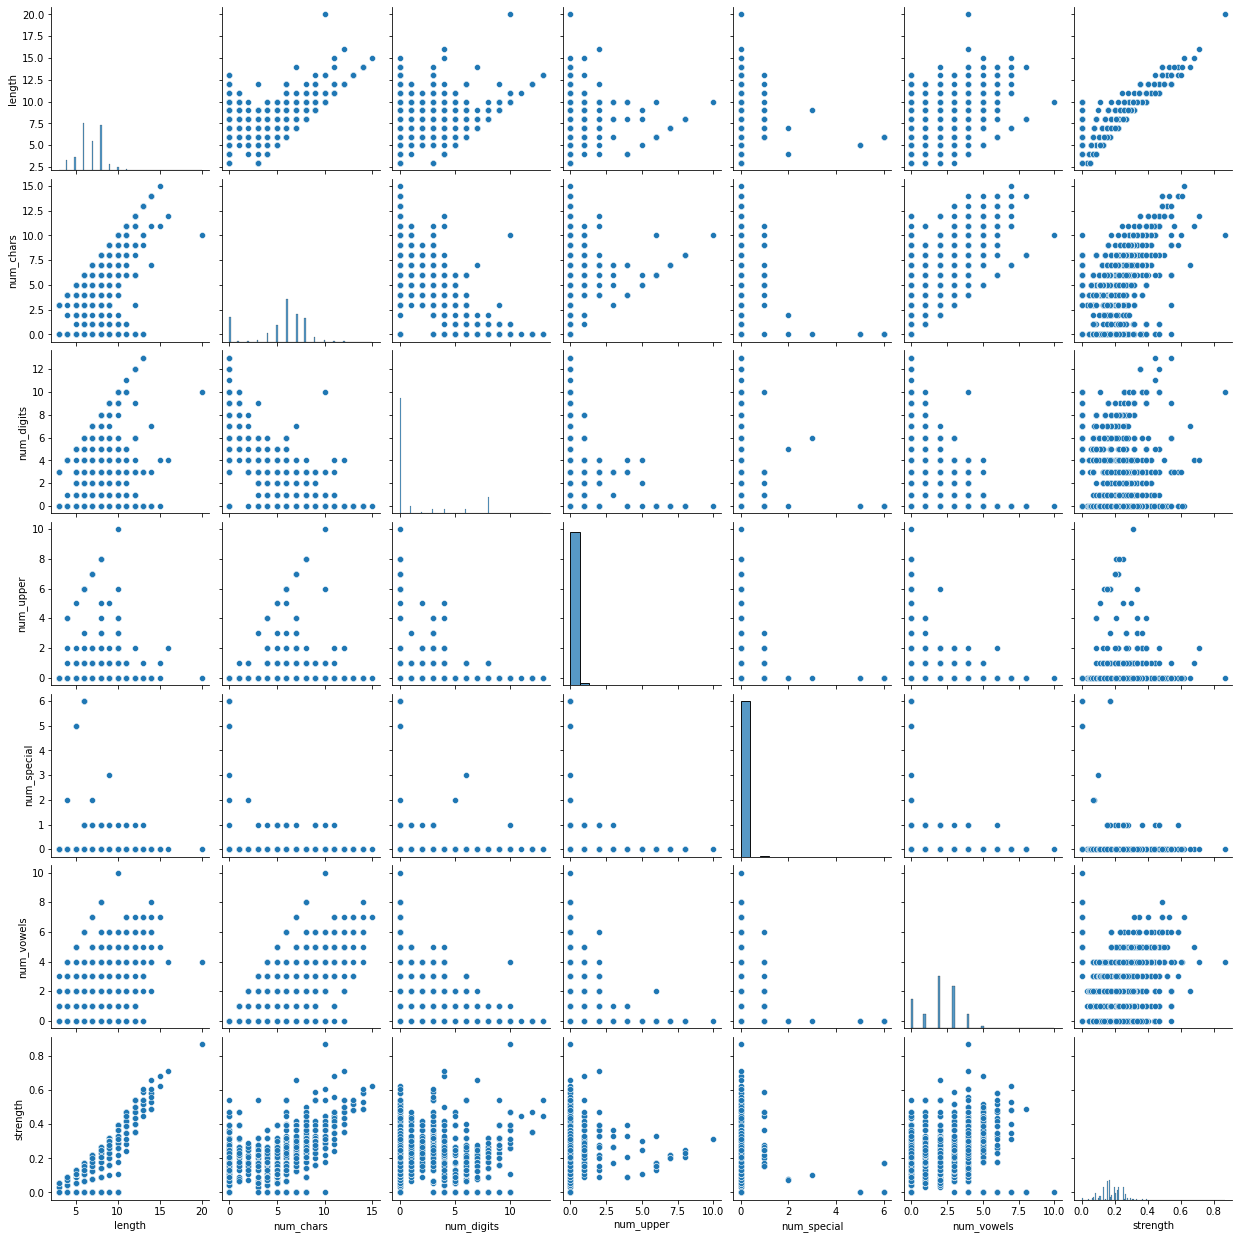

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

impt_columns = ["length", "num_chars", "num_digits", "num_upper", "num_special", "num_vowels", "strength"]

sns.pairplot(df_md[impt_columns])

## K-Means Clustering
The researchers tried clustering the dataset using [Scikit-learn](https://scikit-learn.org/).

In [46]:
from sklearn.cluster import KMeans
import numpy as np

impt_columns = ["length", "num_chars", "num_digits", "num_upper", "num_special", "num_vowels", "strength"]
df_to_cluster = df_md[impt_columns]
X = np.array(df_to_cluster)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

df_to_cluster = pd.concat([df_md["password"], df_to_cluster], axis=1)
df_to_cluster = pd.concat([df_to_cluster, pd.DataFrame(kmeans.labels_)], axis=1)
df_to_cluster.columns = [*df_to_cluster.columns[:-1], 'cluster']
# df_to_cluster.to_csv("clustering_results.csv")
df_to_cluster

,password,length,num_chars,num_digits,num_upper,num_special,num_vowels,strength,cluster
0,123456,6,0,6,0,0,0,0.172331,1
1,password,8,8,0,0,0,2,0.249543,0
2,12345678,8,0,8,0,0,0,0.266667,1
3,qwerty,6,6,0,0,0,1,0.172331,0
4,123456789,9,0,9,0,0,0,0.316993,1
...,...,...,...,...,...,...,...,...,...
12811,hongngoc,8,8,0,0,0,2,0.206394,0
12812,anhtien,7,7,0,0,0,3,0.201053,0
12813,lanhuong,8,8,0,0,0,3,0.249543,0
12814,congacon,8,8,0,0,0,3,0.206394,0


### Analyzing Clusters

In [47]:
df_to_cluster[df_to_cluster["cluster"] == 0].describe()

,length,num_chars,num_digits,num_upper,num_special,num_vowels,strength,cluster
count,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,10612.0
mean,6.726630,6.523558,0.198172,0.033924,0.004900,2.458255,0.188118,0.0
std,1.431104,1.432195,0.663709,0.359293,0.141929,0.996673,0.067634,0.0
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,6.000000,6.000000,0.000000,0.000000,0.000000,2.000000,0.154795,0.0
50%,7.000000,6.000000,0.000000,0.000000,0.000000,2.000000,0.172331,0.0
75%,8.000000,7.000000,0.000000,0.000000,0.000000,3.000000,0.229774,0.0
max,16.000000,15.000000,5.000000,10.000000,6.000000,10.000000,0.712366,0.0


In [48]:
df_to_cluster[df_to_cluster["cluster"] == 0].head()

,password,length,num_chars,num_digits,num_upper,num_special,num_vowels,strength,cluster
1,password,8,8,0,0,0,2,0.249543,0
3,qwerty,6,6,0,0,0,1,0.172331,0
9,dragon,6,6,0,0,0,2,0.172331,0
11,wrongpassword,13,13,0,0,0,3,0.517160,0
12,abc123,6,3,3,0,0,1,0.172331,0


In [49]:
df_to_cluster[df_to_cluster["cluster"] == 1].describe()

,length,num_chars,num_digits,num_upper,num_special,num_vowels,strength,cluster
count,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.0
mean,7.284029,0.181942,7.099365,0.005445,0.002722,0.044465,0.183936,1.0
std,1.509570,0.755083,1.553296,0.116568,0.079672,0.258880,0.080522,0.0
min,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,6.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.133333,1.0
50%,8.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.206394,1.0
75%,8.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.229774,1.0
max,20.000000,10.000000,13.000000,4.000000,3.000000,4.000000,0.868639,1.0


In [50]:
df_to_cluster[df_to_cluster["cluster"] == 1].head()

,password,length,num_chars,num_digits,num_upper,num_special,num_vowels,strength,cluster
0,123456,6,0,6,0,0,0,0.172331,1
2,12345678,8,0,8,0,0,0,0.266667,1
4,123456789,9,0,9,0,0,0,0.316993,1
5,12345,5,0,5,0,0,0,0.128996,1
6,1234,4,0,4,0,0,0,0.088889,1
